In [336]:
import requests
import config
from bs4 import BeautifulSoup as BS
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import itertools



In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
#pip install sodapy

import pandas as pd
from sodapy import Socrata
import config_nyc_od

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)


In [3]:
# Example authenticated client (needed for non-public datasets):
client = Socrata('data.cityofnewyork.us',
                 config_nyc_od.app_tok,
                 username=config_nyc_od.app_username,
                 password=config_nyc_od.app_pw)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("tg4x-b46p", limit=2000)

# Convert to pandas DataFrame
#results_df = pd.DataFrame.from_records(results)

In [83]:
felony_df = pd.read_excel(r'felony_clean.xls')
felony_df['PCT'].fillna( method ='ffill', inplace = True)
felony_df = felony_df[felony_df['CRIME']=='TOTAL SEVEN MAJOR FELONY OFFENSES']
felony_df.head(10)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
15,5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,...,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
23,6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,...,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
31,7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,...,702.0,702.0,704.0,762.0,711,732,781,823,865,919
39,9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,...,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302
47,10.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1398.0,877.0,831.0,1436.0,1466.0,1418.0,1469.0,1326.0,...,1133.0,1049.0,1037.0,1088.0,1123,1022,1061,1032,981,1046
55,13.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3317.0,3054.0,3145.0,3031.0,3071.0,2812.0,2716.0,2540.0,...,2389.0,2136.0,2044.0,2022.0,2152,2061,2056,1879,1694,1954
63,14.0,TOTAL SEVEN MAJOR FELONY OFFENSES,6857.0,6088.0,5265.0,5105.0,4730.0,4423.0,4173.0,3971.0,...,3330.0,3069.0,2896.0,2896.0,2863,2744,2809,2797,2645,2606
71,17.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2028.0,1990.0,1801.0,1796.0,1667.0,1397.0,1391.0,1277.0,...,1018.0,990.0,937.0,1020.0,1024,909,986,1000,1023,1021
79,18.0,TOTAL SEVEN MAJOR FELONY OFFENSES,5607.0,5263.0,4508.0,4144.0,3992.0,3652.0,2945.0,2761.0,...,2479.0,2331.0,2228.0,2313.0,2271,2394,2361,2467,2411,2425


In [5]:
other_felony_df = pd.read_excel(r'other_felony.xls')
other_felony_df['PCT'].fillna( method ='ffill', inplace = True)
other_felony_df = other_felony_df[other_felony_df['CRIME']=='TOTAL NON-SEVEN MAJOR FELONY OFFENSES']
other_felony_df.head()

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,1.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,431.0,555.0,463.0,385.0,474.0,354.0,312.0,353.0,...,408.0,358.0,378.0,383.0,310,353,342,341,363,397
17,5.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,602.0,648.0,584.0,531.0,579.0,634.0,741.0,715.0,...,582.0,556.0,487.0,467.0,414,369,489,691,593,620
26,6.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,788.0,687.0,817.0,615.0,805.0,632.0,676.0,714.0,...,527.0,559.0,426.0,499.0,565,450,507,478,512,473
35,7.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,440.0,520.0,437.0,481.0,581.0,571.0,564.0,700.0,...,552.0,426.0,435.0,458.0,564,517,482,426,420,433
44,9.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,959.0,796.0,712.0,696.0,914.0,907.0,826.0,754.0,...,770.0,715.0,617.0,711.0,750,671,615,613,586,443


In [6]:
misdemeanor_df = pd.read_excel(r'misdemeanor_pct.xls')
misdemeanor_df['PCT'].fillna( method = 'ffill', inplace = True)
misdemeanor_df = misdemeanor_df[misdemeanor_df['CRIME']=='TOTAL MISDEMEANOR OFFENSES']
misdemeanor_df.head(20)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
17,1.0,TOTAL MISDEMEANOR OFFENSES,5609.0,5007.0,4190.0,4753.0,4289.0,3877.0,3669.0,4157.0,...,4196.0,4125.0,4499.0,4693.0,4503,4043,3881,4364,4040,4504
35,5.0,TOTAL MISDEMEANOR OFFENSES,2855.0,2859.0,2504.0,2608.0,2655.0,2597.0,2645.0,2849.0,...,3236.0,3697.0,3320.0,3375.0,3437,3401,3339,3140,3042,2526
53,6.0,TOTAL MISDEMEANOR OFFENSES,6847.0,6513.0,5946.0,4452.0,4117.0,3707.0,4013.0,4605.0,...,4271.0,4365.0,4285.0,4066.0,4035,3718,3397,2933,3256,2860
71,7.0,TOTAL MISDEMEANOR OFFENSES,2419.0,2297.0,2312.0,2730.0,2698.0,2895.0,2590.0,3057.0,...,3146.0,3438.0,3211.0,3270.0,2970,2741,2932,3014,3009,2440
89,9.0,TOTAL MISDEMEANOR OFFENSES,5319.0,4492.0,4445.0,4803.0,4652.0,4239.0,4026.0,4228.0,...,4410.0,4644.0,4581.0,4587.0,4290,3963,3965,3793,3433,3074
107,10.0,TOTAL MISDEMEANOR OFFENSES,3511.0,3052.0,3058.0,3175.0,2809.0,3092.0,3150.0,2690.0,...,2633.0,2670.0,2905.0,2946.0,3077,2677,2516,2648,2327,2233
125,13.0,TOTAL MISDEMEANOR OFFENSES,6056.0,5617.0,5208.0,5063.0,4985.0,4521.0,4128.0,4840.0,...,4892.0,5230.0,5846.0,5785.0,5801,5282,5409,5052,5099,4551
143,14.0,TOTAL MISDEMEANOR OFFENSES,12721.0,11469.0,11416.0,10361.0,9840.0,8615.0,9743.0,10784.0,...,10639.0,10614.0,10036.0,9856.0,10483,10621,9554,9482,9137,7681
161,17.0,TOTAL MISDEMEANOR OFFENSES,2821.0,2822.0,2323.0,2168.0,2059.0,2030.0,1892.0,2018.0,...,1846.0,1794.0,1891.0,2044.0,2075,1862,1641,1947,2217,2215
179,18.0,TOTAL MISDEMEANOR OFFENSES,7231.0,6927.0,5950.0,4912.0,4794.0,4396.0,4587.0,4637.0,...,4872.0,5117.0,5009.0,4987.0,5005,5163,4891,5182,5348,4622


In [7]:
violation_df = pd.read_excel(r'violation_pct.xls')
violation_df['PCT'].fillna( method = 'ffill', inplace = True)
violation_df = violation_df[violation_df['CRIME']=='TOTAL VIOLATION OFFENSES']
violation_df.head(20)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,1.0,TOTAL VIOLATION OFFENSES,1062.0,908.0,865.0,819.0,786.0,614.0,592.0,692.0,...,447.0,438.0,647.0,749.0,498,608,595,724,834,845
5,5.0,TOTAL VIOLATION OFFENSES,571.0,563.0,598.0,507.0,396.0,468.0,394.0,427.0,...,455.0,431.0,426.0,468.0,362,427,421,495,473,483
8,6.0,TOTAL VIOLATION OFFENSES,846.0,814.0,712.0,596.0,511.0,546.0,536.0,455.0,...,435.0,502.0,550.0,474.0,433,458,429,458,417,433
11,7.0,TOTAL VIOLATION OFFENSES,594.0,547.0,534.0,500.0,440.0,517.0,490.0,480.0,...,465.0,454.0,416.0,487.0,438,506,586,614,497,555
14,9.0,TOTAL VIOLATION OFFENSES,1032.0,997.0,971.0,864.0,809.0,826.0,760.0,640.0,...,695.0,651.0,662.0,678.0,605,584,563,584,540,598
17,10.0,TOTAL VIOLATION OFFENSES,619.0,584.0,603.0,594.0,704.0,586.0,524.0,477.0,...,466.0,421.0,395.0,404.0,437,420,390,440,460,593
20,13.0,TOTAL VIOLATION OFFENSES,1180.0,1036.0,1092.0,876.0,1063.0,982.0,882.0,911.0,...,717.0,666.0,683.0,722.0,732,692,765,657,692,767
23,14.0,TOTAL VIOLATION OFFENSES,1702.0,1560.0,1518.0,1297.0,1387.0,1046.0,1114.0,1093.0,...,1121.0,885.0,755.0,818.0,695,855,741,729,764,822
26,17.0,TOTAL VIOLATION OFFENSES,787.0,838.0,695.0,650.0,562.0,495.0,537.0,501.0,...,413.0,393.0,304.0,322.0,320,360,430,439,552,497
29,18.0,TOTAL VIOLATION OFFENSES,1618.0,1366.0,1165.0,1281.0,994.0,852.0,837.0,910.0,...,882.0,898.0,845.0,900.0,1004,1104,1059,1063,1054,1258


In [ ]:
# felony_df = felony_df.set_index('PCT')
# other_felony_df = other_felony_df.set_index('PCT')
# misdemeanor_df = misdemeanor_df.set_index('PCT')
# violation_df = violation_df.set_index('PCT')

In [ ]:
felony_csv = felony_df.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/felony_csv.csv', index=None, header=True)

In [ ]:
other_felony_csv = other_felony_df.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/other_felony_csv.csv', index=None, header=True)

In [ ]:
misdemeanor_csv = misdemeanor_df.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/misdemeanor_csv.csv', index=None, header=True)

In [ ]:
violation_csv = violation_df.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/violation_csv.csv', index=None, header=True)

In [ ]:
x = felony_df['PCT']
y = felony_df.iloc[3]

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x, y, s=200)
#ax.legend(prop={'size': 15})
plt.title('title', fontsize=25)
plt.xticks(size=15)
plt.xlabel('xlabel', size=25)
plt.ylabel('ylabel', size=25)
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=(20, 10))
felony_df2 = felony_df.set_index('PCT')
felony_df2.plot.bar(figsize=(16,8))
#plt.show()

In [8]:
rent_df = pd.read_csv("median_rent.csv")

#rent_df.head()

In [9]:

rent_df = rent_df.dropna()

In [10]:
rent_df.head(20)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3050.0,3100.0,3100.0,3200.0,3195.0,...,3650.0,3750.0,3735.0,3750.0,3827.0,3800.0,3795.0,3800.0,3850.0,3850.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3400.0,3392.0,3450.0,3500.0,3525.0,3550.0,3550.0,3573.0,3595.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2929.0,2900.0,2869.0,2850.0,2850.0,2900.0,2950.0,2900.0,2900.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2261.0,2291.0,2300.0,2350.0,2375.0,2395.0,2425.0,2400.0,2350.0,2350.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3350.0,3348.0,3400.0,3400.0
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2150.0,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4200.0,4100.0,4050.0,4290.0,4650.0,4525.0,4795.0,4900.0,5016.0,4900.0
10,Bay Ridge,Brooklyn,neighborhood,1350.0,1388.0,1350.0,1350.0,1350.0,1350.0,1300.0,...,2000.0,1995.0,1900.0,1963.0,1950.0,1950.0,1850.0,1995.0,2000.0,1999.0
14,Bedford-Stuyvesant,Brooklyn,neighborhood,1650.0,1650.0,1600.0,1650.0,1650.0,1593.0,1460.0,...,2350.0,2300.0,2395.0,2450.0,2500.0,2500.0,2567.0,2595.0,2550.0,2500.0
19,Boerum Hill,Brooklyn,neighborhood,2600.0,2700.0,2600.0,2500.0,2500.0,2463.0,2475.0,...,3000.0,3000.0,3000.0,2998.0,3400.0,3257.0,3225.0,3200.0,3200.0,3250.0


In [11]:
mean_rent_df = rent_df.filter(['areaName', 'Borough', 'areaType'])

In [12]:
df2010 = rent_df.filter(['2010-01', '2010-02', '2010-03', 
                        '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10',
                         '2010-11', '2010-12'])
#df2010.head(20)
series2010 = df2010.mean(axis = 1, skipna = True)

In [13]:
df2011 = rent_df.filter(['2011-01', '2011-02', '2011-03', 
                        '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
                         '2011-11', '2011-12'])
#df2011.head(20)
series2011 = df2011.mean(axis = 1, skipna = True)

In [14]:
df2012 = rent_df.filter(['2012-01', '2012-02', '2012-03', 
                        '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10',
                         '2012-11', '2012-12'])
#df2012.head(20)
series2012 = df2012.mean(axis = 1, skipna=True)

In [15]:
df2013 = rent_df.filter(['2013-01', '2013-02', '2013-03', 
                        '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
                         '2013-11', '2013-12'])
series2013 = df2013.mean(axis = 1, skipna=True)

In [16]:
df2014 = rent_df.filter(['2014-01', '2014-02', '2014-03', 
                        '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
                         '2014-11', '2014-12'])
series2014 = df2014.mean(axis = 1, skipna=True)

In [17]:
df2015 = rent_df.filter(['2015-01', '2015-02', '2015-03', 
                        '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
                         '2015-11', '2015-12'])
series2015 = df2015.mean(axis = 1, skipna=True)

In [18]:
df2016 = rent_df.filter(['2016-01', '2016-02', '2016-03', 
                        '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
                         '2016-11', '2016-12'])
series2016 = df2016.mean(axis = 1, skipna=True)

In [19]:
df2017 = rent_df.filter(['2017-01', '2017-02', '2017-03', 
                        '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
                         '2017-11', '2017-12'])
series2017 = df2017.mean(axis = 1, skipna=True)

In [20]:
df2018 = rent_df.filter(['2018-01', '2018-02', '2018-03', 
                        '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'])
series2018 = df2018.mean(axis = 1, skipna=True)

In [21]:
mean_rent_df['Year 2010'] = series2010
mean_rent_df['Year 2011'] = series2011
mean_rent_df['Year 2012'] = series2012
mean_rent_df['Year 2013'] = series2013
mean_rent_df['Year 2014'] = series2014
mean_rent_df['Year 2015'] = series2015
mean_rent_df['Year 2016'] = series2016
mean_rent_df['Year 2017'] = series2017
mean_rent_df['Year 2018'] = series2018
mean_rent_df.head()

,areaName,Borough,areaType,Year 2010,Year 2011,Year 2012,Year 2013,Year 2014,Year 2015,Year 2016,Year 2017,Year 2018
0,All Downtown,Manhattan,submarket,3249.166667,3449.583333,3554.583333,3560.833333,3613.750000,3718.166667,3767.416667,3694.083333,3763.375
1,All Midtown,Manhattan,submarket,2981.166667,3293.750000,3375.083333,3395.000000,3424.416667,3513.916667,3516.250000,3475.000000,3470.250
2,All Upper East Side,Manhattan,submarket,2517.416667,2650.833333,2752.500000,2798.500000,2739.000000,2945.416667,2981.000000,2962.666667,2893.500
3,All Upper Manhattan,Manhattan,submarket,1840.583333,1930.916667,2000.250000,2041.083333,2096.083333,2245.416667,2361.250000,2333.000000,2349.625
4,All Upper West Side,Manhattan,submarket,2876.916667,3148.166667,3244.583333,3224.916667,3249.083333,3404.583333,3448.083333,3347.000000,3316.000


In [22]:
manhattandf = mean_rent_df[mean_rent_df['Borough'] == "Manhattan"]
manhattandf = manhattan_df[manhattan_df['areaType'] == 'neighborhood']

,areaName,Borough,areaType,Year 2010,Year 2011,Year 2012,Year 2013,Year 2014,Year 2015,Year 2016,Year 2017,Year 2018
0,All Downtown,Manhattan,submarket,3249.166667,3449.583333,3554.583333,3560.833333,3613.750000,3718.166667,3767.416667,3694.083333,3763.375
1,All Midtown,Manhattan,submarket,2981.166667,3293.750000,3375.083333,3395.000000,3424.416667,3513.916667,3516.250000,3475.000000,3470.250
2,All Upper East Side,Manhattan,submarket,2517.416667,2650.833333,2752.500000,2798.500000,2739.000000,2945.416667,2981.000000,2962.666667,2893.500
3,All Upper Manhattan,Manhattan,submarket,1840.583333,1930.916667,2000.250000,2041.083333,2096.083333,2245.416667,2361.250000,2333.000000,2349.625
4,All Upper West Side,Manhattan,submarket,2876.916667,3148.166667,3244.583333,3224.916667,3249.083333,3404.583333,3448.083333,3347.000000,3316.000
9,Battery Park City,Manhattan,neighborhood,3316.416667,3557.166667,3904.833333,3795.083333,4038.500000,4493.166667,4533.000000,4233.666667,4438.750
35,Central Harlem,Manhattan,neighborhood,1877.166667,1983.333333,2079.166667,2150.000000,2206.916667,2335.583333,2447.083333,2410.416667,2495.625
36,Central Park South,Manhattan,neighborhood,6156.250000,5633.166667,5981.083333,7581.250000,7331.250000,7643.750000,7548.000000,7120.583333,7298.500
38,Chelsea,Manhattan,neighborhood,3377.916667,3491.083333,3625.416667,3730.666667,3745.833333,3934.166667,3980.916667,3905.833333,4006.000
39,Chinatown,Manhattan,neighborhood,2619.916667,2697.166667,2608.250000,2781.250000,2738.250000,2737.333333,2821.166667,2773.583333,2737.875


In [ ]:
manhattan_rent_csv = manhattandf.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/manhattan_rent.csv', index=None, header=True)

In [23]:
page = requests.get("https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm")
page

<Response [200]>

In [24]:
page.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<!-- INCLUDE HEADER Version 1.05 7/26/2007 PAGE LAST MODIFIED Monday, 23-Feb-2015 12:15:40 EST -->\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-us" lang="en-us">\r\n<head>\r\n<title>NYC Neighborhood ZIP Code Definitions</title>\r\n<meta name="description" content="Definitions of New York City Neighborhoods" />\r\n<meta name="keywords" content="neighborhood, Neighborhood, New York City, new york city,new york state, New York State" />\r\n<!-- THE FOLLOWING STYLE TAG IS FOR IMPORTING STYLE ONLY -->\r\n<style type="text/css">\r\n<!--\r\n-->\r\n</style>\r\n\r\n\r\n\r\n<!-- -->\r\n\r\n<!-- -->\r\n\r\n\r\n<!-- -->\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!-- -->\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n<meta content="width=device-width, initial-scale=1" name="viewport" />\r\n<meta http-equiv="x-ua-compatible" content="IE=edge" />\r\n\r\n\r

In [25]:
soup = BS(page.content, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- INCLUDE HEADER Version 1.05 7/26/2007 PAGE LAST MODIFIED Monday, 23-Feb-2015 12:15:40 EST -->
<html lang="en-us" xml:lang="en-us" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>NYC Neighborhood ZIP Code Definitions</title>
<meta content="Definitions of New York City Neighborhoods" name="description"/>
<meta content="neighborhood, Neighborhood, New York City, new york city,new york state, New York State" name="keywords"/>
<!-- THE FOLLOWING STYLE TAG IS FOR IMPORTING STYLE ONLY -->
<style type="text/css">
<!--
-->
</style>
<!-- -->
<!-- -->
<!-- -->
<!-- -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="x-ua-compatible"/>
<link href="/style/twenty16/main.css" media="screen" rel="stylesheet"/>
<link href="/style/twenty16/visualizations.css" m

In [26]:
list(soup.children)

['html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd"',
 '\n',
 ' INCLUDE HEADER Version 1.05 7/26/2007 PAGE LAST MODIFIED Monday, 23-Feb-2015 12:15:40 EST ',
 '\n',
 <html lang="en-us" xml:lang="en-us" xmlns="http://www.w3.org/1999/xhtml">
 <head>
 <title>NYC Neighborhood ZIP Code Definitions</title>
 <meta content="Definitions of New York City Neighborhoods" name="description"/>
 <meta content="neighborhood, Neighborhood, New York City, new york city,new york state, New York State" name="keywords"/>
 <!-- THE FOLLOWING STYLE TAG IS FOR IMPORTING STYLE ONLY -->
 <style type="text/css">
 <!--
 -->
 </style>
 <!-- -->
 <!-- -->
 <!-- -->
 <!-- -->
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="width=device-width, initial-scale=1" name="viewport"/>
 <meta content="IE=edge" http-equiv="x-ua-compatible"/>
 <link href="/style/twenty16/main.css" media="screen" rel="stylesheet"/>
 <link href="/style/twenty16

In [27]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [28]:
html = list(soup.children)[4]

In [29]:
html

<html lang="en-us" xml:lang="en-us" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>NYC Neighborhood ZIP Code Definitions</title>
<meta content="Definitions of New York City Neighborhoods" name="description"/>
<meta content="neighborhood, Neighborhood, New York City, new york city,new york state, New York State" name="keywords"/>
<!-- THE FOLLOWING STYLE TAG IS FOR IMPORTING STYLE ONLY -->
<style type="text/css">
<!--
-->
</style>
<!-- -->
<!-- -->
<!-- -->
<!-- -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="x-ua-compatible"/>
<link href="/style/twenty16/main.css" media="screen" rel="stylesheet"/>
<link href="/style/twenty16/visualizations.css" media="screen" rel="stylesheet"/>
<link href="/style/twenty16/nys-global-nav.css" media="screen" rel="stylesheet"/>
<link href="/style/twenty16/nys-global-nav-fonts.css" media="screen" rel="stylesheet"/>
<link h

In [30]:
table = html.find("table")
rows = table.findAll('tr')
zipdata = [[td.findChildren(text=True) for td in tr.findAll("td")] for tr in rows]

In [ ]:
len(zipdata[2])

In [31]:
for item in zipdata:
    if len(item) == 2:
        item.insert(0, None)
zipdata

[[],
 [['Bronx'], [' Central Bronx'], [' 10453, 10457, 10460']],
 [None, [' Bronx Park and Fordham'], [' 10458, 10467, 10468']],
 [None, [' High Bridge and Morrisania'], [' 10451, 10452, 10456']],
 [None, [' Hunts Point and Mott Haven'], [' 10454, 10455, 10459, 10474']],
 [None, [' Kingsbridge and Riverdale'], [' 10463, 10471']],
 [None, [' Northeast Bronx'], [' 10466, 10469, 10470, 10475']],
 [None, [' Southeast Bronx'], [' 10461, 10462,10464, 10465, 10472, 10473']],
 [['Brooklyn'], [' Central Brooklyn'], [' 11212, 11213, 11216, 11233, 11238']],
 [None, [' Southwest Brooklyn'], [' 11209, 11214, 11228']],
 [None, [' Borough Park'], [' 11204, 11218, 11219, 11230']],
 [None, [' Canarsie and Flatlands'], [' 11234, 11236, 11239']],
 [None, [' Southern Brooklyn'], [' 11223, 11224, 11229, 11235']],
 [None, [' Northwest Brooklyn'], [' 11201, 11205, 11215, 11217, 11231']],
 [None, [' Flatbush'], [' 11203, 11210, 11225, 11226']],
 [None, [' East New York and New Lots'], [' 11207, 11208']],
 [No

In [41]:
zipdf = pd.DataFrame(zipdata)
zipdf[0].fillna( method ='ffill', inplace = True)

In [42]:
zipdf.columns = ['Borough', 'Neighborhood', 'Zip_Code']

In [43]:
zipdf = zipdf.dropna()
zipdf['Borough'] = zipdf['Borough'].str[0]
zipdf['Neighborhood'] = zipdf['Neighborhood'].str[0]
zipdf['Zip_Code'] = zipdf['Zip_Code'].str[0]

zipdf

,Borough,Neighborhood,Zip_Code
1,Bronx,Central Bronx,"10453, 10457, 10460"
2,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
3,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
4,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
5,Bronx,Kingsbridge and Riverdale,"10463, 10471"
6,Bronx,Northeast Bronx,"10466, 10469, 10470, 10475"
7,Bronx,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
8,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
9,Brooklyn,Southwest Brooklyn,"11209, 11214, 11228"
10,Brooklyn,Borough Park,"11204, 11218, 11219, 11230"


In [44]:
zipdf = zipdf[zipdf['Borough'] == 'Manhattan']
zipdf

,Borough,Neighborhood,Zip_Code
19,Manhattan,Central Harlem,"10026, 10027, 10030, 10037, 10039"
20,Manhattan,Chelsea and Clinton,"10001, 10011, 10018, 10019, 10020, 10036"
21,Manhattan,East Harlem,"10029, 10035"
22,Manhattan,Gramercy Park and Murray Hill,"10010, 10016, 10017, 10022"
23,Manhattan,Greenwich Village and Soho,"10012, 10013, 10014"
24,Manhattan,Lower Manhattan,"10004, 10005, 10006, 10007, 10038, 10280"
25,Manhattan,Lower East Side,"10002, 10003, 10009"
26,Manhattan,Upper East Side,"10021, 10028, 10044, 10065, 10075, 10128"
27,Manhattan,Upper West Side,"10023, 10024, 10025"
28,Manhattan,Inwood and Washington Heights,"10031, 10032, 10033, 10034, 10040"


In [ ]:
zip_code_csv = zipdf.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/zip_code.csv', index=None, header=True)

In [51]:
zipdf

,Borough,Neighborhood,Zip_Code
19,Manhattan,Central Harlem,"10026, 10027, 10030, 10037, 10039"
20,Manhattan,Chelsea and Clinton,"10001, 10011, 10018, 10019, 10020, 10036"
21,Manhattan,East Harlem,"10029, 10035"
22,Manhattan,Gramercy Park and Murray Hill,"10010, 10016, 10017, 10022"
23,Manhattan,Greenwich Village and Soho,"10012, 10013, 10014"
24,Manhattan,Lower Manhattan,"10004, 10005, 10006, 10007, 10038, 10280"
25,Manhattan,Lower East Side,"10002, 10003, 10009"
26,Manhattan,Upper East Side,"10021, 10028, 10044, 10065, 10075, 10128"
27,Manhattan,Upper West Side,"10023, 10024, 10025"
28,Manhattan,Inwood and Washington Heights,"10031, 10032, 10033, 10034, 10040"


In [56]:
new_zipdf = pd.DataFrame(zipdf.Zip_Code.str.split(', ').tolist(), index=zipdf.Neighborhood).stack()
#new_df = pd.DataFrame(df.City.str.split('|').tolist(), index=df.EmployeeId).stack()
new_zipdf

Neighborhood                     
 Central Harlem                 0     10026
                                1     10027
                                2     10030
                                3     10037
                                4     10039
 Chelsea and Clinton            0     10001
                                1     10011
                                2     10018
                                3     10019
                                4     10020
                                5     10036
 East Harlem                    0     10029
                                1     10035
 Gramercy Park and Murray Hill  0     10010
                                1     10016
                                2     10017
                                3     10022
 Greenwich Village and Soho     0     10012
                                1     10013
                                2     10014
 Lower Manhattan                0     10004
                                1     1000

In [57]:
new_zipdf = new_zipdf.reset_index([0, 'Neighborhood'])
new_zipdf

,Neighborhood,0
0,Central Harlem,10026
1,Central Harlem,10027
2,Central Harlem,10030
3,Central Harlem,10037
4,Central Harlem,10039
5,Chelsea and Clinton,10001
6,Chelsea and Clinton,10011
7,Chelsea and Clinton,10018
8,Chelsea and Clinton,10019
9,Chelsea and Clinton,10020


In [58]:
new_zipdf.columns = ['Neighborhood', 'Zip_Code']

In [61]:
new_zipdf.set_index('Zip_Code')

,Neighborhood
Zip_Code,
10026,Central Harlem
10027,Central Harlem
10030,Central Harlem
10037,Central Harlem
10039,Central Harlem
10001,Chelsea and Clinton
10011,Chelsea and Clinton
10018,Chelsea and Clinton
10019,Chelsea and Clinton


In [63]:
manhattan_df = manhattandf[manhattandf['areaType'] == 'neighborhood']

In [105]:
manhattan_df = manhattan_df.drop([120])

In [106]:
manhattan_df

,areaName,Borough,areaType,Year 2010,Year 2011,Year 2012,Year 2013,Year 2014,Year 2015,Year 2016,Year 2017,Year 2018
9,Battery Park City,Manhattan,neighborhood,3316.416667,3557.166667,3904.833333,3795.083333,4038.500000,4493.166667,4533.000000,4233.666667,4438.750
35,Central Harlem,Manhattan,neighborhood,1877.166667,1983.333333,2079.166667,2150.000000,2206.916667,2335.583333,2447.083333,2410.416667,2495.625
36,Central Park South,Manhattan,neighborhood,6156.250000,5633.166667,5981.083333,7581.250000,7331.250000,7643.750000,7548.000000,7120.583333,7298.500
38,Chelsea,Manhattan,neighborhood,3377.916667,3491.083333,3625.416667,3730.666667,3745.833333,3934.166667,3980.916667,3905.833333,4006.000
39,Chinatown,Manhattan,neighborhood,2619.916667,2697.166667,2608.250000,2781.250000,2738.250000,2737.333333,2821.166667,2773.583333,2737.875
62,East Harlem,Manhattan,neighborhood,2034.833333,1953.666667,2098.583333,2138.500000,2099.666667,2241.000000,2359.166667,2378.583333,2331.375
65,East Village,Manhattan,neighborhood,2597.750000,2855.416667,2976.916667,3122.666667,3117.333333,3094.416667,3172.833333,3136.916667,3244.125
69,Financial District,Manhattan,neighborhood,3142.000000,3435.666667,3572.000000,3468.083333,3523.250000,3621.750000,3586.333333,3625.083333,3666.750
71,Flatiron,Manhattan,neighborhood,4013.166667,4174.000000,4236.666667,4235.666667,4518.583333,4966.750000,4838.333333,4680.416667,4607.500
83,Gramercy Park,Manhattan,neighborhood,3112.083333,3207.083333,3365.666667,3424.250000,3366.916667,3526.666667,3572.166667,3445.000000,3513.250


In [66]:
felony_df.head()

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
15,5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,...,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
23,6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,...,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
31,7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,...,702.0,702.0,704.0,762.0,711,732,781,823,865,919
39,9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,...,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302


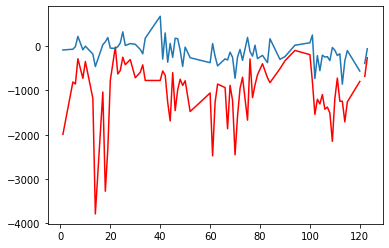

In [98]:
x = felony_df['PCT']
y1 = (felony_df['y2010'])-(felony_df['y2000'])
y2 = (felony_df['y2018'])-(felony_df['y2010'])

plt.plot(x, y1, color='red')
plt.plot(x, y2)
plt.show()

In [89]:
felony_df.columns

Index(['PCT', 'CRIME', 'y2000', 'y2001', 'y2002', 'y2003', 'y2004', 'y2005',
       'y2006', 'y2007', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013',
       'y2014', 'y2015', 'y2016', 'y2017', 'y2018'],
      dtype='object')

In [96]:
violation_df.columns = ('PCT', 'CRIME', 'y2000', 'y2001', 'y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007',
                     'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018')

In [99]:
violation_df

,PCT,CRIME,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
2,1.0,TOTAL VIOLATION OFFENSES,1062.0,908.0,865.0,819.0,786.0,614.0,592.0,692.0,...,447.0,438.0,647.0,749.0,498,608,595,724,834,845
5,5.0,TOTAL VIOLATION OFFENSES,571.0,563.0,598.0,507.0,396.0,468.0,394.0,427.0,...,455.0,431.0,426.0,468.0,362,427,421,495,473,483
8,6.0,TOTAL VIOLATION OFFENSES,846.0,814.0,712.0,596.0,511.0,546.0,536.0,455.0,...,435.0,502.0,550.0,474.0,433,458,429,458,417,433
11,7.0,TOTAL VIOLATION OFFENSES,594.0,547.0,534.0,500.0,440.0,517.0,490.0,480.0,...,465.0,454.0,416.0,487.0,438,506,586,614,497,555
14,9.0,TOTAL VIOLATION OFFENSES,1032.0,997.0,971.0,864.0,809.0,826.0,760.0,640.0,...,695.0,651.0,662.0,678.0,605,584,563,584,540,598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,115.0,TOTAL VIOLATION OFFENSES,1402.0,1457.0,1247.0,1012.0,966.0,1046.0,1139.0,1116.0,...,975.0,1034.0,1008.0,896.0,996,918,820,1002,1236,1180
221,120.0,TOTAL VIOLATION OFFENSES,2404.0,2356.0,2055.0,1788.0,2037.0,2137.0,2264.0,2205.0,...,2005.0,2123.0,1872.0,1921.0,1792,1642,1660,1531,1653,1650
224,121.0,TOTAL VIOLATION OFFENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,608,1144,1118,1195,1237,1226
227,122.0,TOTAL VIOLATION OFFENSES,2486.0,2288.0,2200.0,2000.0,2286.0,1973.0,2257.0,2215.0,...,1783.0,1771.0,1595.0,1597.0,1247,1084,1031,1083,1293,1210


In [107]:
rent_zip_codes = ['10280', '10026', '10019', '10001', '10038', '10029', '10003', '10005', '10010', '10016',
                 '10014', '10031', '10034', '10013', '10002', '10017', '10022', '10018', '10025', '10044',
                 '10012', '10007', '10128', '10023', '10032', '10011']

In [108]:
manhattan_df.insert(2, 'Zip_Code', rent_zip_codes)

In [109]:
manhattan_df

,areaName,Borough,Zip_Code,areaType,Year 2010,Year 2011,Year 2012,Year 2013,Year 2014,Year 2015,Year 2016,Year 2017,Year 2018
9,Battery Park City,Manhattan,10280,neighborhood,3316.416667,3557.166667,3904.833333,3795.083333,4038.500000,4493.166667,4533.000000,4233.666667,4438.750
35,Central Harlem,Manhattan,10026,neighborhood,1877.166667,1983.333333,2079.166667,2150.000000,2206.916667,2335.583333,2447.083333,2410.416667,2495.625
36,Central Park South,Manhattan,10019,neighborhood,6156.250000,5633.166667,5981.083333,7581.250000,7331.250000,7643.750000,7548.000000,7120.583333,7298.500
38,Chelsea,Manhattan,10001,neighborhood,3377.916667,3491.083333,3625.416667,3730.666667,3745.833333,3934.166667,3980.916667,3905.833333,4006.000
39,Chinatown,Manhattan,10038,neighborhood,2619.916667,2697.166667,2608.250000,2781.250000,2738.250000,2737.333333,2821.166667,2773.583333,2737.875
62,East Harlem,Manhattan,10029,neighborhood,2034.833333,1953.666667,2098.583333,2138.500000,2099.666667,2241.000000,2359.166667,2378.583333,2331.375
65,East Village,Manhattan,10003,neighborhood,2597.750000,2855.416667,2976.916667,3122.666667,3117.333333,3094.416667,3172.833333,3136.916667,3244.125
69,Financial District,Manhattan,10005,neighborhood,3142.000000,3435.666667,3572.000000,3468.083333,3523.250000,3621.750000,3586.333333,3625.083333,3666.750
71,Flatiron,Manhattan,10010,neighborhood,4013.166667,4174.000000,4236.666667,4235.666667,4518.583333,4966.750000,4838.333333,4680.416667,4607.500
83,Gramercy Park,Manhattan,10016,neighborhood,3112.083333,3207.083333,3365.666667,3424.250000,3366.916667,3526.666667,3572.166667,3445.000000,3513.250


In [110]:
updated_rent_csv = manhattandf.to_csv(r'/Users/andrewtriola/Documents/flatiron/stats_project/updated_manhattan_rent.csv', index=None, header=True)

In [112]:
film_permits_df = pd.read_csv(r'manhattan_film_permit_results_df')

In [113]:
value_zip_code_df = pd.read_csv(r'mean_value_by_zipcode')

In [114]:
permits_by_zip_df = pd.read_csv(r'permits_per_zip_df')

In [131]:
film_permits_df = film_permits_df[film_permits_df['eventtype'] == 'Shooting Permit']

In [133]:
film_permits_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'eventid', 'eventtype', 'startdatetime',
       'enddatetime', 'enteredon', 'parkingheld', 'borough',
       'communityboard_s', 'policeprecinct_s', 'category', 'subcategoryname',
       'zipcode_s'],
      dtype='object')

In [247]:
felony_df.head()

,PCT,CRIME,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
15,5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,...,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
23,6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,...,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
31,7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,...,702.0,702.0,704.0,762.0,711,732,781,823,865,919
39,9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,...,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302


In [248]:
other_felony_df.head()

,PCT,CRIME,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
8,1.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,431.0,555.0,463.0,385.0,474.0,354.0,312.0,353.0,...,408.0,358.0,378.0,383.0,310,353,342,341,363,397
17,5.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,602.0,648.0,584.0,531.0,579.0,634.0,741.0,715.0,...,582.0,556.0,487.0,467.0,414,369,489,691,593,620
26,6.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,788.0,687.0,817.0,615.0,805.0,632.0,676.0,714.0,...,527.0,559.0,426.0,499.0,565,450,507,478,512,473
35,7.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,440.0,520.0,437.0,481.0,581.0,571.0,564.0,700.0,...,552.0,426.0,435.0,458.0,564,517,482,426,420,433
44,9.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,959.0,796.0,712.0,696.0,914.0,907.0,826.0,754.0,...,770.0,715.0,617.0,711.0,750,671,615,613,586,443


In [145]:
#new_df = film_permits_df[film_permits_df['policeprecinct_s'] != '0']
film_permits_df = new_df[new_df['policeprecinct_s'] != '2,000']
film_permits_df['policeprecinct_s'].value_counts()

18     3118
1      2642
10     1970
14     1919
13     1429
6      1248
19     1151
5       991
20      727
9       616
26      440
17      397
7       391
30      324
33      280
24      279
28      240
23      221
22      154
34      141
108     127
25      116
32       88
114      54
104      12
110       5
84        4
112       3
115       3
44        2
100       2
106       2
109       2
66        2
76        2
103       1
49        1
75        1
107       1
120       1
77        1
88        1
40        1
123       1
122       1
79        1
Name: policeprecinct_s, dtype: int64

In [149]:
film_updated = film_permits_df.astype({'policeprecinct_s': 'float64'})

In [151]:
film_permits_df = film_updated

In [152]:
film_permits_df.head()

,Unnamed: 0,Unnamed: 0.1,eventid,eventtype,startdatetime,enddatetime,enteredon,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,zipcode_s
0,2,2,510595,Shooting Permit,2019-10-01T06:00:00.000,2019-10-01T09:00:00.000,2019-09-30T10:57:02.000,WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5.0,18.0,Television,News,10036.0
1,6,6,510464,Shooting Permit,2019-10-01T06:00:00.000,2019-10-02T23:59:00.000,2019-09-27T15:51:42.000,GANSEVOORT STREET between WASHINGTON STREET an...,Manhattan,2.0,6.0,Theater,Theater,10014.0
4,14,14,510372,Shooting Permit,2019-09-28T00:00:00.000,2019-09-28T18:00:00.000,2019-09-27T06:17:19.000,WEST 150 STREET between MACOMBS PLACE and ADA...,Manhattan,10.0,25.0,Commercial,Commercial,10026.0
5,15,15,510360,Shooting Permit,2019-10-01T08:00:00.000,2019-10-01T20:00:00.000,2019-09-27T01:25:22.000,BROOME STREET between ELDRIDGE STREET and FORS...,Manhattan,3.0,5.0,Film,Short,10002.0
6,23,23,510325,Shooting Permit,2019-09-30T06:00:00.000,2019-09-30T22:00:00.000,2019-09-26T15:47:06.000,WEST 19 STREET between 11 AVENUE and 10 AVENUE,Manhattan,4.0,10.0,Television,Episodic series,10011.0


In [249]:
felony_df_stats_only = felony_df.set_index('PCT')
felony_df_stats_only.head()

,CRIME,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
PCT,,,,,,,,,,,,,,,,,,,,
1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,1708.0,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,1029.0,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,1738.0,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,807.0,702.0,702.0,704.0,762.0,711,732,781,823,865,919
9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,1495.0,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302


In [250]:
new_felony_df_stats_only= felony_df_stats_only.drop('CRIME', axis=1)
new_felony_df_stats_only.head()

,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
PCT,,,,,,,,,,,,,,,,,,,
1.0,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,1708.0,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
5.0,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,1029.0,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
6.0,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,1738.0,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
7.0,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,807.0,702.0,702.0,704.0,762.0,711,732,781,823,865,919
9.0,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,1495.0,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302


In [251]:
new_new_f = new_felony_df_stats_only.filter(['PCT', 'y2016', 'y2017', 'y2018'])
new_new_f.head()

,y2016,y2017,y2018
PCT,,,
1.0,1395,1337,1356
5.0,899,889,897
6.0,1388,1432,1517
7.0,823,865,919
9.0,1463,1300,1302


In [254]:
new_new_new_f = new_new_f.reset_index()
new_new_new_f.head()

,PCT,y2016,y2017,y2018,sum
0,1.0,1395,1337,1356,4088
1,5.0,899,889,897,2685
2,6.0,1388,1432,1517,4337
3,7.0,823,865,919,2607
4,9.0,1463,1300,1302,4065


In [253]:
new_new_f['sum'] = new_new_f.sum(axis=1)
new_new_f.head()

,y2016,y2017,y2018,sum
PCT,,,,
1.0,1395,1337,1356,4088
5.0,899,889,897,2685
6.0,1388,1432,1517,4337
7.0,823,865,919,2607
9.0,1463,1300,1302,4065


In [181]:
#new_fp = film_permits_df.filter(['eventid', 'policeprecinct_s', 'category', 'zipcode_s'])
new_fp.groupby(['policeprecinct_s']).count()
#df['freq'] = df.groupby('a')['a'].transform('count')
new_fp['total_permits'] = new_fp.groupby('policeprecinct_s')['policeprecinct_s'].transform('count')
new_fp.head(50)

,eventid,policeprecinct_s,category,zipcode_s,total_permits
0,510595,18.0,Television,10036.0,3118.0
1,510464,6.0,Theater,10014.0,1248.0
4,510372,25.0,Commercial,10026.0,116.0
5,510360,5.0,Film,10002.0,991.0
6,510325,10.0,Television,10011.0,1970.0
7,510323,5.0,Film,10002.0,991.0
8,510305,6.0,Television,10003.0,1248.0
9,510271,18.0,Television,10036.0,3118.0
10,510246,14.0,Television,10018.0,1919.0
12,510227,28.0,Television,10026.0,240.0


In [184]:
new_fp = new_fp.filter(['policeprecinct_s', 'total_permits'])



,total_permits
policeprecinct_s,
18.0,3118.0
6.0,1248.0
25.0,116.0
5.0,991.0
10.0,1970.0
5.0,991.0
6.0,1248.0
18.0,3118.0
14.0,1919.0


In [266]:
#df = df.drop_duplicates('COL2')
#new_new_fp =new_fp.drop_duplicates('policeprecinct_s')
new_new_fp.head(20)

,policeprecinct_s,total_permits
0,18.0,3118.0
1,6.0,1248.0
4,25.0,116.0
5,5.0,991.0
6,10.0,1970.0
10,14.0,1919.0
12,28.0,240.0
17,108.0,127.0
18,30.0,324.0
19,7.0,391.0


In [255]:
felony_film_df = pd.merge(new_new_new_f, new_new_fp, left_on='PCT', right_on='policeprecinct_s')
felony_film_df.tail(30)

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
16,26.0,597,596,683,1876,26.0,440.0
17,28.0,1033,966,947,2946,28.0,240.0
18,30.0,722,696,807,2225,30.0,324.0
19,32.0,1052,950,1026,3028,32.0,88.0
20,33.0,712,681,708,2101,33.0,280.0
21,34.0,1323,1382,1377,4082,34.0,141.0
22,40.0,2430,2476,2344,7250,40.0,1.0
23,44.0,2260,2112,2053,6425,44.0,2.0
24,49.0,1291,1261,1220,3772,49.0,1.0
25,66.0,1040,912,974,2926,66.0,2.0


In [198]:
felony_film_df.head()

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
0,1.0,1395,1337,1356,4088,1.0,2642.0
1,5.0,899,889,897,2685,5.0,991.0
2,6.0,1388,1432,1517,4337,6.0,1248.0
3,7.0,823,865,919,2607,7.0,391.0
4,9.0,1463,1300,1302,4065,9.0,616.0


In [246]:
other_felony_film_df.head()

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
0,1.0,1395,1337,1356,4088,1.0,2642.0
1,5.0,899,889,897,2685,5.0,991.0
2,6.0,1388,1432,1517,4337,6.0,1248.0
3,7.0,823,865,919,2607,7.0,391.0
4,9.0,1463,1300,1302,4065,9.0,616.0


In [256]:
new_ofelony_df_stats_only = other_felony_df.drop('CRIME', axis=1)
new_ofelony_df_stats_only.head()



,PCT,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
8,1.0,431.0,555.0,463.0,385.0,474.0,354.0,312.0,353.0,410.0,408.0,358.0,378.0,383.0,310,353,342,341,363,397
17,5.0,602.0,648.0,584.0,531.0,579.0,634.0,741.0,715.0,696.0,582.0,556.0,487.0,467.0,414,369,489,691,593,620
26,6.0,788.0,687.0,817.0,615.0,805.0,632.0,676.0,714.0,625.0,527.0,559.0,426.0,499.0,565,450,507,478,512,473
35,7.0,440.0,520.0,437.0,481.0,581.0,571.0,564.0,700.0,498.0,552.0,426.0,435.0,458.0,564,517,482,426,420,433
44,9.0,959.0,796.0,712.0,696.0,914.0,907.0,826.0,754.0,587.0,770.0,715.0,617.0,711.0,750,671,615,613,586,443


In [259]:
new_new_of = new_ofelony_df_stats_only.filter(['PCT', 'y2016', 'y2017', 'y2018'])
new_new_of.head()


,PCT,y2016,y2017,y2018
8,1.0,341,363,397
17,5.0,691,593,620
26,6.0,478,512,473
35,7.0,426,420,433
44,9.0,613,586,443


In [260]:
new_new_of['sum'] = new_new_of.sum(axis=1)
new_new_of.head()

,PCT,y2016,y2017,y2018,sum
8,1.0,341,363,397,1102.0
17,5.0,691,593,620,1909.0
26,6.0,478,512,473,1469.0
35,7.0,426,420,433,1286.0
44,9.0,613,586,443,1651.0


In [261]:
new_new_new_of = new_new_of.reset_index()
new_new_new_of

,index,PCT,y2016,y2017,y2018,sum
0,8,1.0,341,363,397,1102.0
1,17,5.0,691,593,620,1909.0
2,26,6.0,478,512,473,1469.0
3,35,7.0,426,420,433,1286.0
4,44,9.0,613,586,443,1651.0
...,...,...,...,...,...,...
72,656,115.0,836,879,844,2674.0
73,665,120.0,866,895,1070,2951.0
74,674,121.0,762,604,597,2084.0
75,683,122.0,698,586,578,1984.0


In [262]:
other_felony_film_df = pd.merge(new_new_new_of, new_new_fp, left_on='PCT', right_on='policeprecinct_s')
other_felony_film_df.head()

,index,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
0,8,1.0,341,363,397,1102.0,1.0,2642.0
1,17,5.0,691,593,620,1909.0,5.0,991.0
2,26,6.0,478,512,473,1469.0,6.0,1248.0
3,35,7.0,426,420,433,1286.0,7.0,391.0
4,44,9.0,613,586,443,1651.0,9.0,616.0


In [207]:
new_misdemeanor_df_stats_only= misdemeanor_df.drop('CRIME', axis=1)

In [219]:
new_new = new_misdemeanor_df_stats_only.filter(['PCT', 'y2016', 'y2017', 'y2018'])

In [220]:
new_new['sum'] = new_new.sum(axis=1)

In [217]:
new_new_new = new_new.reset_index()

In [221]:
new_new

,PCT,y2016,y2017,y2018,sum
17,1.0,4364,4040,4504,12909.0
35,5.0,3140,3042,2526,8713.0
53,6.0,2933,3256,2860,9055.0
71,7.0,3014,3009,2440,8470.0
89,9.0,3793,3433,3074,10309.0
...,...,...,...,...,...
1313,115.0,4835,4789,4510,14249.0
1331,120.0,5154,4826,4683,14783.0
1349,121.0,4151,3932,3599,11803.0
1367,122.0,2795,2646,2496,8059.0


In [222]:
misdemeanor_film_df = pd.merge(new_new, new_new_fp, left_on='PCT', right_on='policeprecinct_s')

In [223]:
misdemeanor_film_df

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
0,1.0,4364,4040,4504,12909.0,1.0,2642.0
1,5.0,3140,3042,2526,8713.0,5.0,991.0
2,6.0,2933,3256,2860,9055.0,6.0,1248.0
3,7.0,3014,3009,2440,8470.0,7.0,391.0
4,9.0,3793,3433,3074,10309.0,9.0,616.0
5,10.0,2648,2327,2233,7218.0,10.0,1970.0
6,13.0,5052,5099,4551,14715.0,13.0,1429.0
7,14.0,9482,9137,7681,26314.0,14.0,1919.0
8,17.0,1947,2217,2215,6396.0,17.0,397.0
9,18.0,5182,5348,4622,15170.0,18.0,3118.0


In [224]:
new_violation_df_stats_only = violation_df.drop('CRIME', axis=1)
new_new=new_violation_df_stats_only.filter(['PCT', 'y2016', 'y2017', 'y2018'])
new_new['sum'] = new_new.sum(axis=1)

In [225]:
violation_film_df= pd.merge(new_new, new_new_fp, left_on='PCT', right_on='policeprecinct_s')

In [226]:
violation_film_df

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
0,1.0,724,834,845,2404.0,1.0,2642.0
1,5.0,495,473,483,1456.0,5.0,991.0
2,6.0,458,417,433,1314.0,6.0,1248.0
3,7.0,614,497,555,1673.0,7.0,391.0
4,9.0,584,540,598,1731.0,9.0,616.0
5,10.0,440,460,593,1503.0,10.0,1970.0
6,13.0,657,692,767,2129.0,13.0,1429.0
7,14.0,729,764,822,2329.0,14.0,1919.0
8,17.0,439,552,497,1505.0,17.0,397.0
9,18.0,1063,1054,1258,3393.0,18.0,3118.0


In [263]:
felony_film_df.corr(method='pearson')

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
PCT,1.000000,-0.048786,-0.089094,-0.117928,-0.085144,1.000000,-0.597083
y2016,-0.048786,1.000000,0.992664,0.987088,0.996399,-0.048786,0.285175
y2017,-0.089094,0.992664,1.000000,0.992559,0.998128,-0.089094,0.297411
y2018,-0.117928,0.987088,0.992559,1.000000,0.996228,-0.117928,0.323190
sum,-0.085144,0.996399,0.998128,0.996228,1.000000,-0.085144,0.302687
policeprecinct_s,1.000000,-0.048786,-0.089094,-0.117928,-0.085144,1.000000,-0.597083
total_permits,-0.597083,0.285175,0.297411,0.323190,0.302687,-0.597083,1.000000


In [264]:
other_felony_film_df.corr(method='pearson')

,index,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
index,1.000000,0.998824,0.131225,0.186346,0.232813,0.218678,0.998824,-0.601912
PCT,0.998824,1.000000,0.130598,0.183149,0.229020,0.216258,1.000000,-0.597083
y2016,0.131225,0.130598,1.000000,0.970022,0.937120,0.981510,0.130598,-0.213411
y2017,0.186346,0.183149,0.970022,1.000000,0.973241,0.993584,0.183149,-0.198964
y2018,0.232813,0.229020,0.937120,0.973241,1.000000,0.982980,0.229020,-0.184786
sum,0.218678,0.216258,0.981510,0.993584,0.982980,1.000000,0.216258,-0.222964
policeprecinct_s,0.998824,1.000000,0.130598,0.183149,0.229020,0.216258,1.000000,-0.597083
total_permits,-0.601912,-0.597083,-0.213411,-0.198964,-0.184786,-0.222964,-0.597083,1.000000


In [286]:
violation_film_df.corr(method='pearson')

,PCT,y2016,y2017,y2018,sum,policeprecinct_s,total_permits
PCT,1.000000,0.318356,0.332288,0.266817,0.336517,1.000000,-0.597083
y2016,0.318356,1.000000,0.982540,0.972912,0.990907,0.318356,-0.182453
y2017,0.332288,0.982540,1.000000,0.986470,0.996621,0.332288,-0.167803
y2018,0.266817,0.972912,0.986470,1.000000,0.991644,0.266817,-0.119674
sum,0.336517,0.990907,0.996621,0.991644,1.000000,0.336517,-0.174386
policeprecinct_s,1.000000,0.318356,0.332288,0.266817,0.336517,1.000000,-0.597083
total_permits,-0.597083,-0.182453,-0.167803,-0.119674,-0.174386,-0.597083,1.000000


In [291]:
felony_list = felony_df.values.tolist()
top_felony_list1 = felony_list[0]
top_felony_list2 = felony_list[9]


In [292]:
top_felony_list1

[1.0,
 'TOTAL SEVEN MAJOR FELONY OFFENSES',
 3438.0,
 3069.0,
 2715.0,
 2649.0,
 2383.0,
 2305.0,
 2013.0,
 1914.0,
 1708.0,
 1578.0,
 1445.0,
 1402.0,
 1416.0,
 1416,
 1208,
 1446,
 1395,
 1337,
 1356]

In [294]:
print(top_felony_list1.pop(0))

TOTAL SEVEN MAJOR FELONY OFFENSES


In [295]:
top_felony_list1

[3438.0,
 3069.0,
 2715.0,
 2649.0,
 2383.0,
 2305.0,
 2013.0,
 1914.0,
 1708.0,
 1578.0,
 1445.0,
 1402.0,
 1416.0,
 1416,
 1208,
 1446,
 1395,
 1337,
 1356]

In [279]:
top_felony1 = list(map(int, top_felony_list1)) # => [1,2,3]

In [282]:
print(top_felony_list2.pop(0))

TOTAL SEVEN MAJOR FELONY OFFENSES


In [284]:
top_felony2 = list(map(int, top_felony_list2))

In [285]:
from scipy.stats import ttest_ind
import numpy as np
ttest_ind(top_felony1, top_felony2)

Ttest_indResult(statistic=-4.1841688359582925, pvalue=0.00017552099421652955)

In [287]:
ofelony_list = other_felony_df.values.tolist()
top_ofelony_list1 = ofelony_list[0]
top_ofelony_list2 = ofelony_list[9]


In [290]:
print(top_ofelony_list1.pop(0))

TOTAL NON-SEVEN MAJOR FELONY OFFENSES


In [296]:
top_ofelony1 = list(map(int, top_ofelony_list1))

In [298]:
print(top_ofelony_list2.pop(0))

TOTAL NON-SEVEN MAJOR FELONY OFFENSES


In [299]:
top_ofelony2 = list(map(int, top_ofelony_list2))

In [300]:
ttest_ind(top_ofelony1, top_ofelony2)

Ttest_indResult(statistic=-7.131143283917835, pvalue=2.2107727807863365e-08)

In [301]:
misdemeanor_list = misdemeanor_df.values.tolist()
top_misdemeanor_list1 = misdemeanor_list[0]
top_misdemeanor_list2 = misdemeanor_list[9]

In [303]:
print(top_misdemeanor_list1.pop(0))

TOTAL MISDEMEANOR OFFENSES


In [304]:
top_misdemeanor1 = list(map(int, top_misdemeanor_list1))

In [306]:
print(top_misdemeanor_list2.pop(0))

TOTAL MISDEMEANOR OFFENSES


In [307]:
top_misdemeanor2 = list(map(int, top_misdemeanor_list2))

In [308]:
ttest_ind(top_misdemeanor1, top_misdemeanor2)

Ttest_indResult(statistic=-4.0738664047693325, pvalue=0.0002428774573421269)

In [309]:
violation_list = violation_df.values.tolist()
top_violation_list1 = violation_list[0]
top_violation_list2 = violation_list[9]

In [311]:
print(top_violation_list1.pop(0))

TOTAL VIOLATION OFFENSES


In [312]:
top_violation1 = list(map(int, top_violation_list1))

In [314]:
print(top_violation_list2.pop(0))

TOTAL VIOLATION OFFENSES


In [315]:
top_violation2 = list(map(int, top_violation_list2))

In [316]:
ttest_ind(top_violation1, top_violation2)

Ttest_indResult(statistic=-5.7874002310570845, pvalue=1.3369092747432683e-06)

In [324]:
new_fp2 = film_permits_df.filter(['eventid', 'policeprecinct_s', 'category', 'zipcode_s'])
#new_fp2.groupby(['policeprecinct_s']).count()
#df['freq'] = df.groupby('a')['a'].transform('count')
new_fp2['total_permits'] = new_fp2.groupby('policeprecinct_s')['policeprecinct_s'].transform('count')
new_fp2.head(50)

,eventid,policeprecinct_s,category,zipcode_s,total_permits
0,510595,18.0,Television,10036.0,3118.0
1,510464,6.0,Theater,10014.0,1248.0
4,510372,25.0,Commercial,10026.0,116.0
5,510360,5.0,Film,10002.0,991.0
6,510325,10.0,Television,10011.0,1970.0
7,510323,5.0,Film,10002.0,991.0
8,510305,6.0,Television,10003.0,1248.0
9,510271,18.0,Television,10036.0,3118.0
10,510246,14.0,Television,10018.0,1919.0
12,510227,28.0,Television,10026.0,240.0


In [325]:
felony_film_df2 = pd.merge(felony_df, new_fp2, left_on='PCT', right_on='policeprecinct_s')
felony_film_df2.shape
felony_film_df2.head()

,PCT,CRIME,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,...,y2014,y2015,y2016,y2017,y2018,eventid,policeprecinct_s,category,zipcode_s,total_permits
0,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1208,1446,1395,1337,1356,510074,1.0,Television,10005.0,2642.0
1,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1208,1446,1395,1337,1356,509944,1.0,Television,10004.0,2642.0
2,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1208,1446,1395,1337,1356,509810,1.0,Television,10004.0,2642.0
3,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1208,1446,1395,1337,1356,509720,1.0,Television,10002.0,2642.0
4,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1208,1446,1395,1337,1356,509564,1.0,Still Photography,10013.0,2642.0


In [329]:
felony_film_df3 = felony_film_df2[felony_film_df2['PCT'] < 22]
felony_film_df3.tail()

,PCT,CRIME,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,...,y2014,y2015,y2016,y2017,y2018,eventid,policeprecinct_s,category,zipcode_s,total_permits
16594,20.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1742.0,1509.0,1499.0,1510.0,1660.0,1519.0,1327.0,1259.0,...,899,873,854,952,923,128308,20.0,Television,10023.0,727.0
16595,20.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1742.0,1509.0,1499.0,1510.0,1660.0,1519.0,1327.0,1259.0,...,899,873,854,952,923,127746,20.0,Television,10023.0,727.0
16596,20.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1742.0,1509.0,1499.0,1510.0,1660.0,1519.0,1327.0,1259.0,...,899,873,854,952,923,127723,20.0,Film,10023.0,727.0
16597,20.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1742.0,1509.0,1499.0,1510.0,1660.0,1519.0,1327.0,1259.0,...,899,873,854,952,923,127166,20.0,Television,10023.0,727.0
16598,20.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1742.0,1509.0,1499.0,1510.0,1660.0,1519.0,1327.0,1259.0,...,899,873,854,952,923,126665,20.0,Television,10024.0,727.0


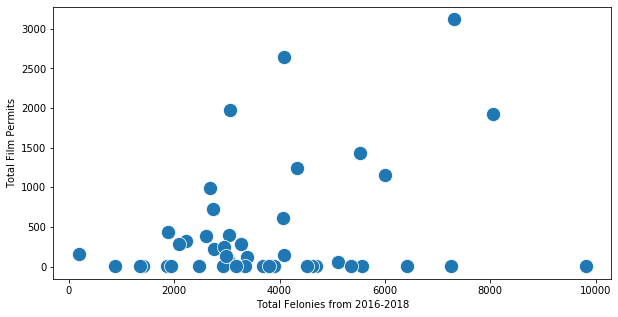

In [353]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(felony_film_df['sum'], felony_film_df['total_permits'], s=200)
plt.xlabel('Total Felonies from 2016-2018')
plt.ylabel('Total Film Permits')
plt.show()

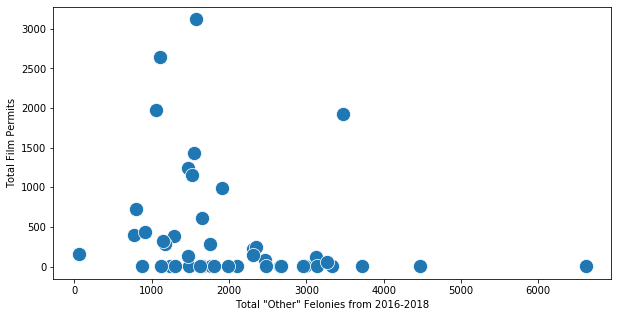

In [354]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(other_felony_film_df['sum'], other_felony_film_df['total_permits'], s=200)
plt.xlabel('Total "Other" Felonies from 2016-2018')
plt.ylabel('Total Film Permits')
plt.show()

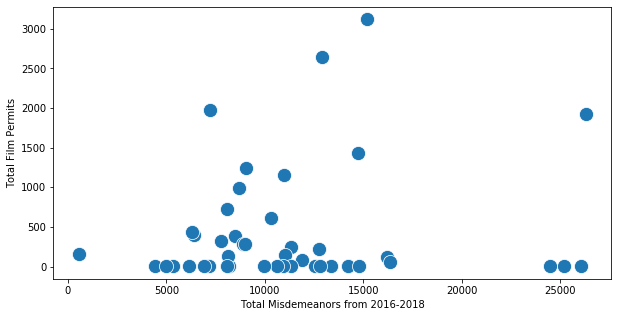

In [355]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(misdemeanor_film_df['sum'], misdemeanor_film_df['total_permits'], s=200)
plt.xlabel('Total Misdemeanors from 2016-2018')
plt.ylabel('Total Film Permits')
plt.show()

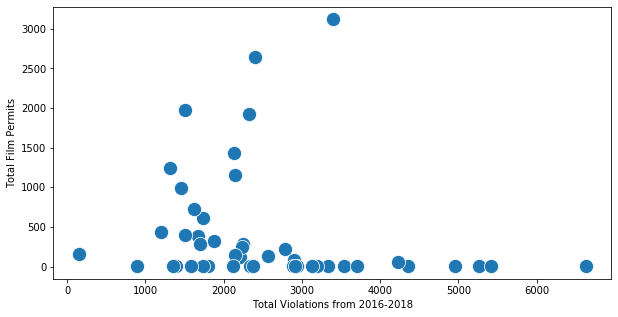

In [356]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(violation_film_df['sum'], violation_film_df['total_permits'], s=200)
plt.xlabel('Total Violations from 2016-2018')
plt.ylabel('Total Film Permits')
plt.show()